In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("E:\Coursera\DS_PROJ\salary_data_cleaned.csv")

In [29]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensorflow,ml,dl,tableau,datawrangling,cloudcomputing,spark,databasemanagement,hadoop,communication
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,1,0,1,0,0,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,1,0,0,0,0,0,0,0,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,1,0,0,0,0,1,0,0,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,1,1,0,0,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,1,0,0,0,0,0,0,0,1


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'company_txt', 'Job_state', 'same_state', 'age_of_company', 'python',
       'excel', 'R', 'aws', 'SQL', 'devops', 'tensorflow', 'ml', 'dl',
       'tableau', 'datawrangling', 'cloudcomputing', 'spark',
       'databasemanagement', 'hadoop', 'communication'],
      dtype='object')

In [31]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [32]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [33]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [34]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [37]:
df['Job_state'] = df.Job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.Job_state.value_counts()


CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
IN     10
UT     10
MO      9
AZ      9
AL      8
MI      6
KY      6
DE      6
GA      6
CT      5
IA      5
NE      4
OR      4
LA      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: Job_state, dtype: int64

In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'company_txt', 'Job_state', 'same_state', 'age_of_company', 'python',
       'excel', 'R', 'aws', 'SQL', 'devops', 'tensorflow', 'ml', 'dl',
       'tableau', 'datawrangling', 'cloudcomputing', 'spark',
       'databasemanagement', 'hadoop', 'communication', 'job_simp',
       'seniority'],
      dtype='object')

In [39]:
##  Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [40]:
##  Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)


In [41]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [42]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [44]:
## hourly wage to annual
df['Min_Salary'] = df.apply(lambda x: x.Min_Salary*2 if x.Hourly ==1 else x.Min_Salary, axis =1)
df['Max_Salary'] = df.apply(lambda x: x.Max_Salary*2 if x.Hourly ==1 else x.Max_Salary, axis =1)


In [45]:
df[df.Hourly ==1][['Hourly','Min_Salary','Max_Salary']]

,Hourly,Min_Salary,Max_Salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [46]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'company_txt', 'Job_state', 'same_state', 'age_of_company', 'python',
       'excel', 'R', 'aws', 'SQL', 'devops', 'tensorflow', 'ml', 'dl',
       'tableau', 'datawrangling', 'cloudcomputing', 'spark',
       'databasemanagement', 'hadoop', 'communication', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [47]:
df.company_txt

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [48]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [49]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [50]:
df.describe()

,Rating,Founded,Hourly,Employer_provided,Min_Salary,Max_Salary,Avg_Salary,same_state,age_of_company,python,...,dl,tableau,datawrangling,cloudcomputing,spark,databasemanagement,hadoop,communication,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,...,0.084906,0.199461,0.010782,0.020216,0.225067,0.028302,0.167116,0.582210,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,...,0.278929,0.399865,0.103343,0.140832,0.417908,0.165946,0.373331,0.493528,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [51]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'company_txt', 'Job_state', 'same_state', 'age_of_company', 'python',
       'excel', 'R', 'aws', 'SQL', 'devops', 'tensorflow', 'ml', 'dl',
       'tableau', 'datawrangling', 'cloudcomputing', 'spark',
       'databasemanagement', 'hadoop', 'communication', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

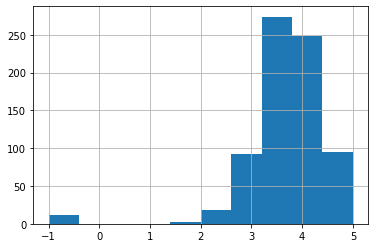

In [52]:
df.Rating.hist()

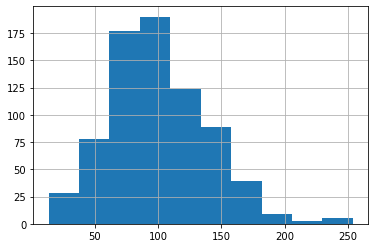

In [54]:
df.Avg_Salary.hist()

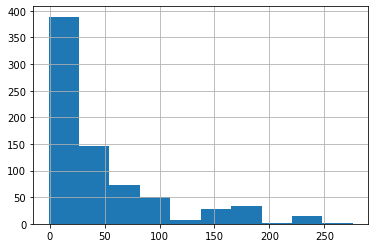

In [57]:
df.age_of_company.hist()

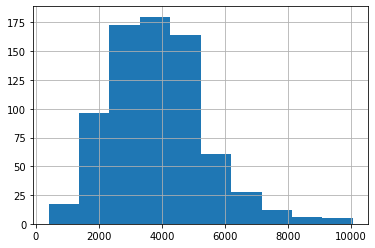

In [58]:
df.desc_len.hist()

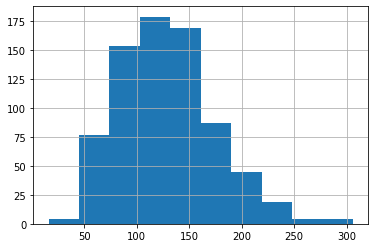

In [60]:
df.Max_Salary.hist()

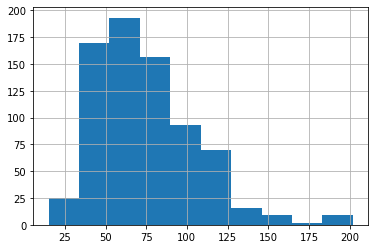

In [61]:
df.Min_Salary.hist()

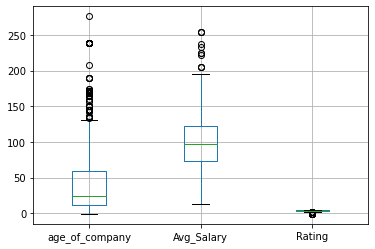

In [63]:
df.boxplot(column = ['age_of_company','Avg_Salary','Rating'])

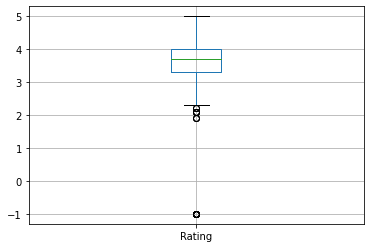

In [64]:
df.boxplot(column = 'Rating')

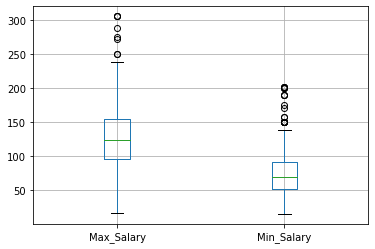

In [65]:
df.boxplot(column = ['Max_Salary','Min_Salary'])

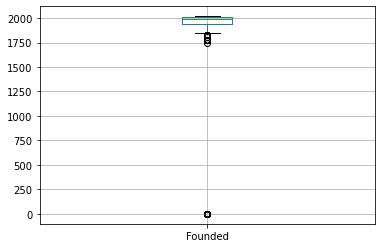

In [66]:
df.boxplot(column = 'Founded')

In [68]:
df[['age_of_company','Avg_Salary','Rating','desc_len']].corr()

,age_of_company,Avg_Salary,Rating,desc_len
age_of_company,1.000000,0.019655,0.021655,0.163911
Avg_Salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


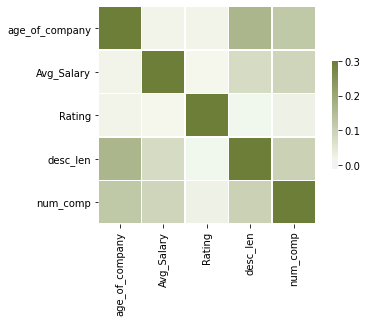

In [72]:
cmap = sns.diverging_palette(120, 100, as_cmap=True)
sns.heatmap(df[['age_of_company','Avg_Salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [93]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'Job_state','same_state', 'python', 'R',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


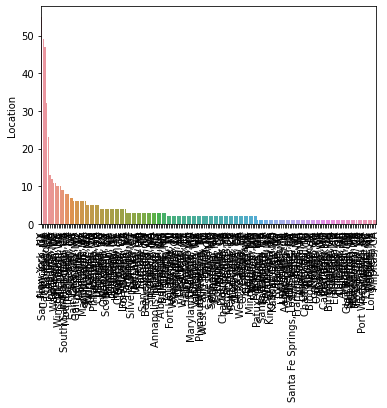

graph for Headquarters: total = 198


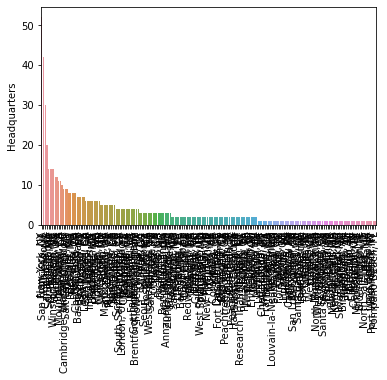

graph for Size: total = 9


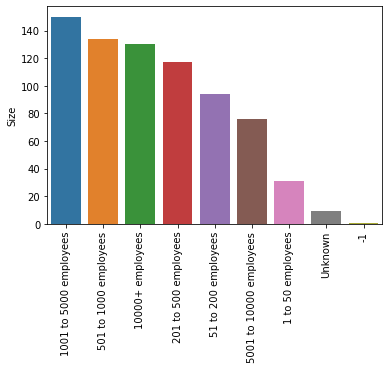

graph for Type of ownership: total = 11


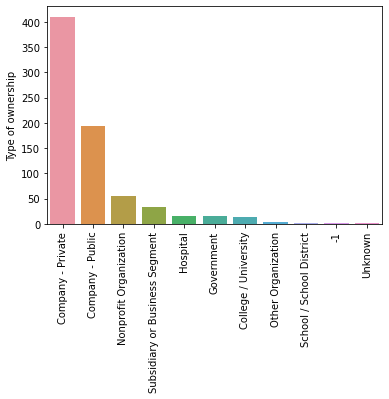

graph for Industry: total = 60


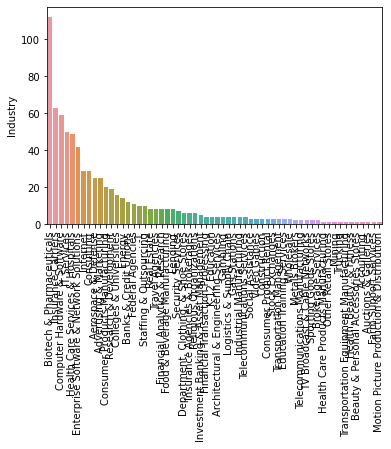

graph for Sector: total = 25


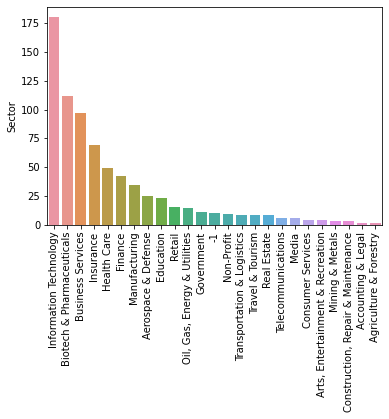

graph for Revenue: total = 14


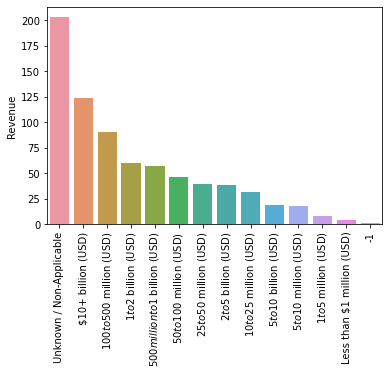

graph for company_txt: total = 343


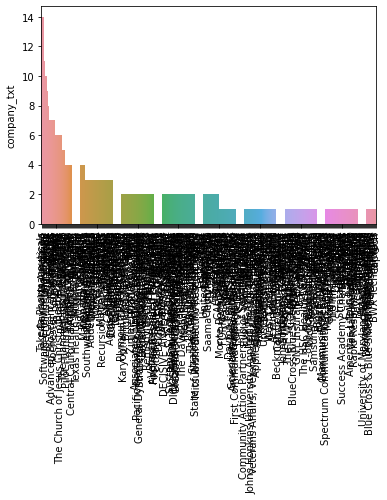

graph for Job_state: total = 37


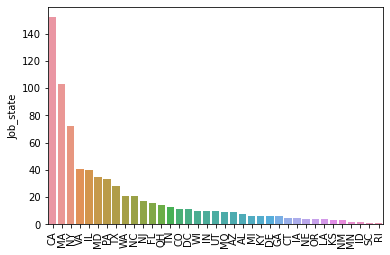

graph for same_state: total = 2


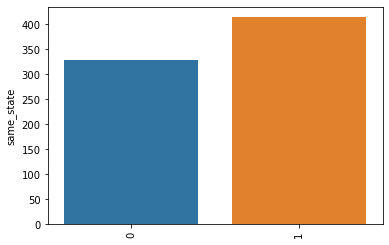

graph for python: total = 2


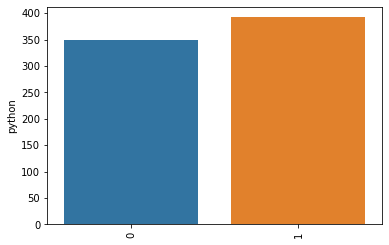

graph for R: total = 2


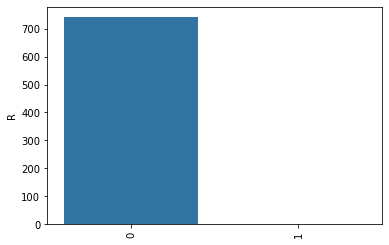

graph for spark: total = 2


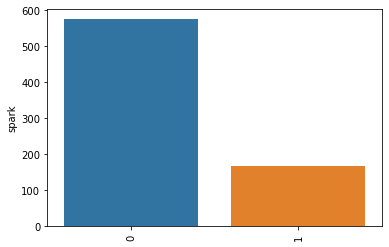

graph for aws: total = 2


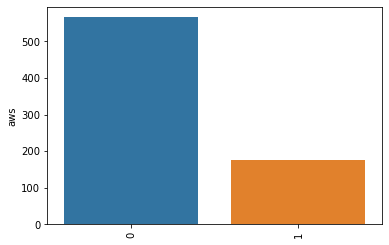

graph for excel: total = 2


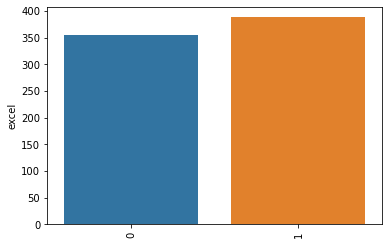

graph for job_simp: total = 7


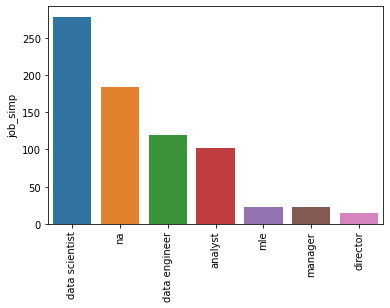

graph for seniority: total = 3


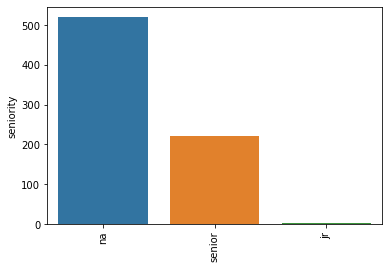

In [94]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


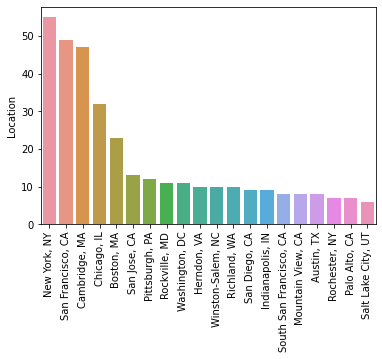

graph for Headquarters: total = 20


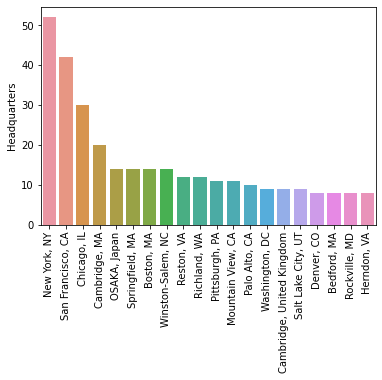

graph for company_txt: total = 20


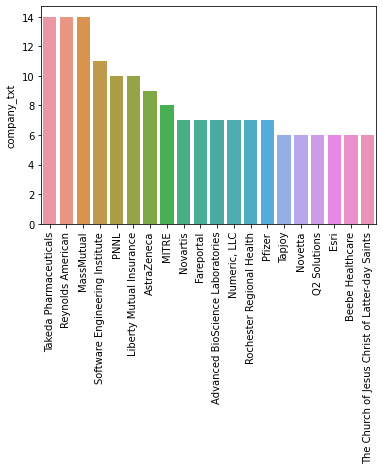

In [89]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [90]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'company_txt', 'Job_state', 'same_state', 'age_of_company', 'python',
       'excel', 'R', 'aws', 'SQL', 'devops', 'tensorflow', 'ml', 'dl',
       'tableau', 'datawrangling', 'cloudcomputing', 'spark',
       'databasemanagement', 'hadoop', 'communication', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [92]:
df_cat01 = df[['SQL', 'devops', 'tensorflow', 'ml', 'dl',
       'tableau', 'datawrangling', 'cloudcomputing', 'spark',
       'databasemanagement', 'hadoop', 'communication']]

graph for SQL: total = 2


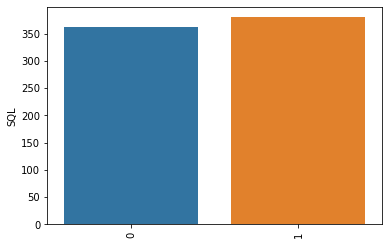

graph for devops: total = 2


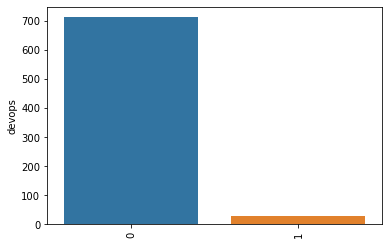

graph for tensorflow: total = 2


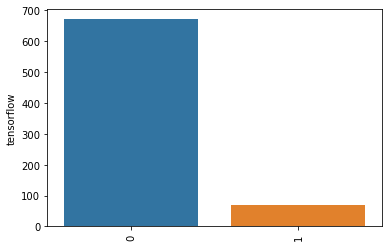

graph for ml: total = 2


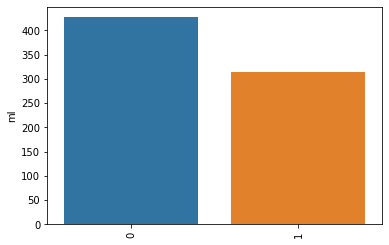

graph for dl: total = 2


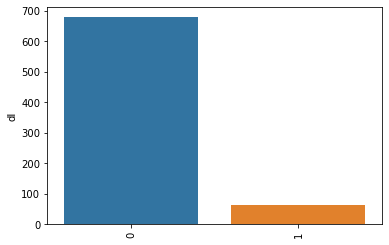

graph for tableau: total = 2


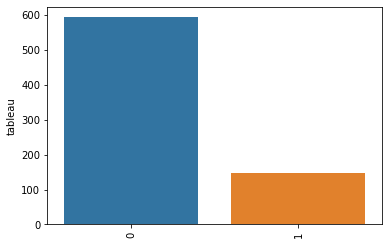

graph for datawrangling: total = 2


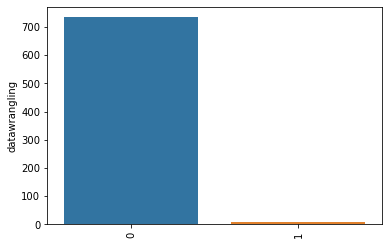

graph for cloudcomputing: total = 2


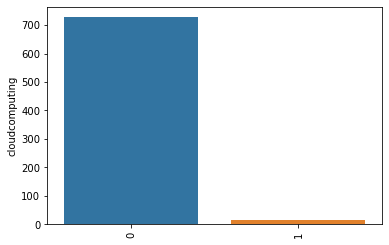

graph for spark: total = 2


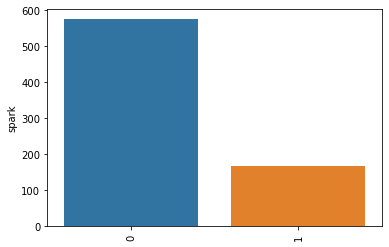

graph for databasemanagement: total = 2


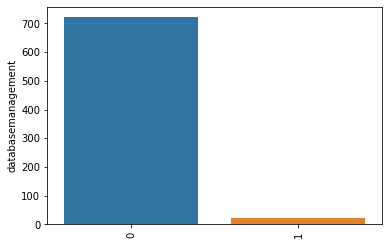

graph for hadoop: total = 2


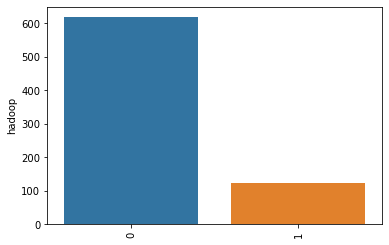

graph for communication: total = 2


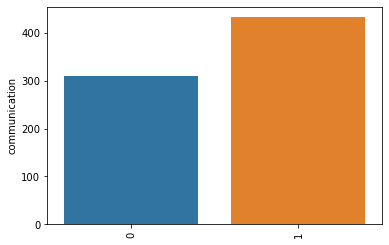

In [95]:
for i in df_cat01.columns:
    cat_num = df_cat01[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [97]:
pd.pivot_table(df, index = 'job_simp', values = 'Avg_Salary')

,Avg_Salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [99]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'Avg_Salary')

Avg_Salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [100]:
pd.pivot_table(df, index = ['Job_state','job_simp'], values = 'Avg_Salary').sort_values('Job_state', ascending = False)

Avg_Salary
Job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [101]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [102]:
pd.pivot_table(df, index = ['Job_state','job_simp'], values = 'Avg_Salary', aggfunc = 'count').sort_values('Job_state', ascending = False)

Avg_Salary
Job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [103]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Job_state', values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False)

,Avg_Salary
Job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [105]:
pd.pivot_table(df[df.job_simp == 'analyst'], index = 'Job_state', values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False)

,Avg_Salary
Job_state,
RI,100.000000
CA,85.250000
NJ,83.583333
MD,80.666667
MN,76.000000
VA,71.583333
IL,66.500000
NY,65.607143
DC,63.500000


In [106]:
pd.pivot_table(df[df.job_simp == 'data engineer'], index = 'Job_state', values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False)

,Avg_Salary
Job_state,
CA,129.540000
IN,114.500000
TX,113.062500
NJ,112.000000
MD,109.000000
MA,107.291667
NC,104.250000
IA,102.833333
TN,100.950000


In [112]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Hourly', 'Employer_provided', 'python', 'R','aws', 'excel', 'Type of ownership','SQL', 'devops', 'tensorflow', 'ml', 'dl',
       'tableau', 'datawrangling', 'cloudcomputing', 'spark',
       'databasemanagement', 'hadoop', 'communication','Avg_Salary']]

In [108]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'company_txt', 'Job_state', 'same_state', 'age_of_company', 'python',
       'excel', 'R', 'aws', 'SQL', 'devops', 'tensorflow', 'ml', 'dl',
       'tableau', 'datawrangling', 'cloudcomputing', 'spark',
       'databasemanagement', 'hadoop', 'communication', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [113]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False))

Rating
        Avg_Salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          Avg_Salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'Avg_Salary' not 1-dimensional

In [115]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'Avg_Salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [122]:
!pip install wordcloud

In [123]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [125]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [127]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

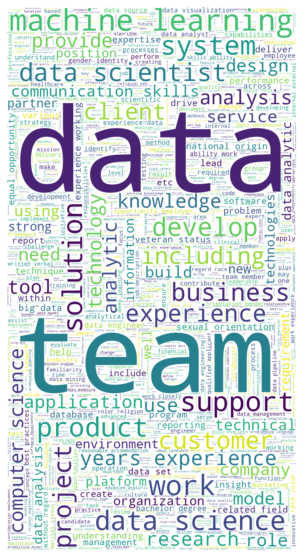

In [129]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()